In [49]:
import numpy as np
import sklearn.datasets as ds
import matplotlib.pyplot as plt

In [7]:
dataset = ds.fetch_olivetti_faces(shuffle = True)

In [26]:
data = dataset.data
labels = dataset.target

In [27]:
data.shape

(400, 4096)

In [28]:
labels.shape

(400,)

In [29]:
data = data.T
data.shape

In [41]:
X = data - np.mean(data, axis = 1)[:, None]

In [42]:
np.mean(X, axis = 1)

array([ 1.2099743e-07,  1.4618040e-07,  6.2137843e-08, ...,
       -1.5683472e-08, -1.1138618e-08, -3.3378601e-08], dtype=float32)

In [45]:
S = (1/X.shape[1])*(np.matmul(X, X.T))
S.shape

(4096, 4096)

In [53]:
w, v = np.linalg.eig(S)

Text(0,0.5,'eigen value')

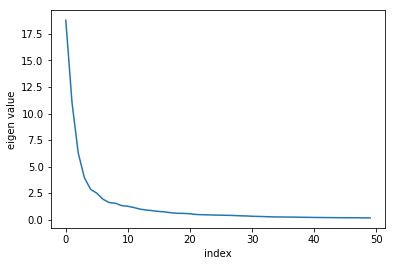

In [113]:
#sort in descending order of eigen values
idx = np.argsort(w)
idx = idx[::-1]
w_sorted = w[idx]
v_sorted = v[idx]
# top 50 eigen values
plt.plot(w[:50])
plt.xlabel('index')
plt.ylabel('eigen value')

In [110]:
#num of principal components to keep
k = 40
#Projection matrix
P = v_sorted[:, :k]
#Projected data
D = np.matmul(X.T, P)
D.shape

(400, 40)

In [111]:
#reconstruction
X_h = np.matmul(D, P.T)
X_h.shape

(400, 4096)

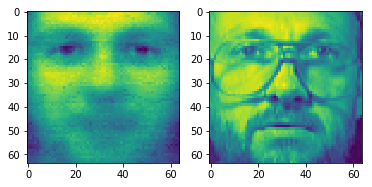

In [112]:
i = 0
x = data[:, i].reshape(64, 64)
xh = X_h[i].reshape(64, 64) + data.mean(axis = 1).reshape(64, 64)
plt.subplot(1, 2, 1)
plt.imshow(xh)
plt.subplot(1, 2, 2)
plt.imshow(x)